Before you turn this assignment in, make sure everything runs as expected. **Restart the kernel and run all cells** (in the menubar, select Kernel$\rightarrow$Restart Kernel and Run All Cells...).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove the `raise NotImplementedError()` lines. 

Code blocks starting with a `# tests` comment provide unit tests which have to run without errors in order to get full points. Be aware that there might be further 'secret' tests to check correct implementation! I.e. the provided unit tests are necessary but not sufficient for full points!

You are always welcome to add **additional plots, tests, or debug outputs**.
However, make sure to: **1) not break the automated tests**, and **2) switch off any excessive debug output** when you submit your notebook!

Do not delete or copy existing cells!! You may create new cells if necessary, but usually you only need to modify the cells where indicated!

If you process this notebook outside of JupyterHub make sure:
- Do not change the metadata or change cells which are read only!
- If the validation fails after modifying the notebook outside of JupyterHub, fetch a fresh version from the server and only copy/paste the parts that you changed into the fresh notebook!
- If the notebook cannot be autograded because of changes made outside of JupyterHub, you may loose points!

Please add your name and student ID below:

In [1]:
NAME = "Paul Erpenstein"
STUDENT_ID = "12107369"

In [2]:
assert len(NAME) > 0, "Enter your name!"
assert len(STUDENT_ID) > 0, "Enter your student ID!"

# Exercise 1 notebook B

The submission deadline is **28.11.2022 23:55.**

## Task Description    
    
The goal of this part is to train and evaluate a machine learnin (ML) model on the data we prepared in the first notebook. The task of the model is to predict the number of influenza infections (`weekly_infections`) given the features (all other columns, like temperature etc.) for a week within a influenza season.

You should use the data you processed and exported in notebook A. If you where unable to finish the data preparation part correctly, you can also load the  sample solution version of the prepared data.

The notebook is structured the following way:
First we will visualize the data to get a better understanding, then we will identify suitable machine learning methods and train a model.
We will then try to build an optimal ML pipeline for the task.
Finally we will test the trained ML model on the holdout test dataset.

Out of the total 100 points of exercise 1, this notebook contributes 45 points.

**Notebook A (data preparation), 55 points:**
 - Task 1: 20 points
 - Task 2: 15 points
 - Task 3: 10 points
 - Task 4: 5 points
 - Task 5: 5 points

**Notebook B (this notebook), 45 points:**
 - Task 6: 15 points (Visualization)
 - Task 7: 20 points (Train models)
 - Task 8: 10 points (Test models)

## Setup Python and load data
Import necessary Python modules and load the preprocessed data which was stored in notebook A.

### Add imports

In [3]:
# DO NOT MODIFY OR COPY THIS CELL!!
# Note: The only imports allowed are Python's standard libraries, pandas, numpy, 
#       scipy, matplotlib, seaborn and scikit-learn
# You can always add additional imports of functions, classes, etc. within 
# these libraries!

import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import pickle
import os
import typing
import inspect

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-kylucyww because the default path (/home/e12107369/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### Load data
Load the preprocessed data from notebook A or from the share, if notebook A was not completed! 

In [4]:
# Set this to true, if you want to force-use the correct data from the server:
FORCE_SERVER_DATA = False

In [5]:
# DO NOT MODIFY OR COPY THIS CELL!!
user_local_path = os.path.join(os.path.expanduser('~'), "data_processed.pickle")
server_data_path = os.path.join(os.path.expanduser('~'), "shared", "data", "data_processed.pickle")
if os.path.exists(user_local_path) and not FORCE_SERVER_DATA:
    with open(user_local_path, "rb") as fp:
        data_processed = pickle.load(fp)
else:
    if not FORCE_SERVER_DATA:
        print("WARNING! Did not find local data, running with provided data! Did you complete notebook A? If so make sure the data was stored correctly!")
    else:
        print("WARNING! Using provided data since switch FORCE_SERVER_DATA is on!")
    with open(server_data_path,"rb") as fp:
        data_processed = pickle.load(fp)

display(data_processed)

weekly_infections  temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  \
year week                                                                       
2009 40                 6600             9.4            23.1        15.576190   
     41                 7100            11.3            27.0        16.733333   
     42                 7700             2.3            11.0         5.714286   
     43                 8300             3.5            13.2         8.157143   
     44                 8600             1.1            13.2         7.519048   
...                      ...             ...             ...              ...   
2021 8                  2300             1.9            19.5         6.873810   
     9                  3000            -3.8            13.5         4.650000   
     10                 3500            -0.8            15.2         5.657143   
     11                 3200            -2.1            10.3         3.161905   
     12                 3000             1.2            18.2         8.552381   

           temp_weeklyMedian  hum_weeklyMin  hum_weeklyMax  hum_weeklyMean  \
year week                                                                    
2009 40                 15.5             46             95       71.000000   
     41                 14.9             48             90       73.571429   
     42                  4.6             54             91       77.333333   
     43                  8.5             63             96       81.238095   
     44                  8.6             66             97       81.809524   
...                      ...            ...            ...             ...   
2021 8                   5.1             26            100       74.380952   
     9                   5.1             36             98       69.000000   
     10                  5.7             34             83       59.285714   
     11                  2.8             38             85       63.428571   
     12                  7.3             33             84       56.857143   

           wind_weeklyMean  wind_weeklyMax  wind_weeklyMin  precip_weeklyMin  \
year week                                                                      
2009 40           2.285714               4               0               0.0   
     41           2.142857               4               1               0.0   
     42           3.428571               5               1               0.1   
     43           1.904762               3               1               0.0   
     44           2.047619               4               0               0.0   
...                    ...             ...             ...               ...   
2021 8            1.761905               4               0               0.0   
     9            1.857143               3               0               0.0   
     10           2.476190               4               1               0.0   
     11           2.809524               5               0               0.0   
     12           2.428571               4               1               0.0   

           precip_weeklyMax  precip_weeklyMean  
year week                                       
2009 40                 0.2           0.042857  
     41                 4.2           1.700000  
     42                 9.3           3.157143  
     43                 1.9           0.300000  
     44                 4.7           0.700000  
...                     ...                ...  
2021 8                  5.7           0.814286  
     9                  7.6           1.228571  
     10                 4.2           1.028571  
     11                 1.2           0.442857  
     12                 0.1           0.014286  

[310 rows x 14 columns]

In [6]:
# test, DO NOT MODIFY OR COPY THIS CELL!!
target_column = 'weekly_infections'

assert data_processed.shape[0] > 300, "there should be more than 300 rows in the merged dataset"
assert data_processed.shape[1] == 14, "1 column for infections, 13 feature columns"

assert not data_processed.isna().any().any(), "All missing values should be eliminated!"
assert not data_processed[target_column].isna().any(), "The dataframe must have a weekly_infections column!"


## Task 6: Visualization (15 Poins)

To better understand the dataset, create visualisations of the merged data using `pandas`, `matplotlib` or `seaborn` that help explore potential relationships between the variables before developing a model.
We are particularly interested in the relationships of the variable to be modeled (`weekly_infections`) with the other columns (weather features).

- Create multiple figures using different diagram types.
- Make at least 3 different plots and use 2 different plot types
- Use a proper labeleling: include tite, axis labels, legends, ... Your plots should present information clearly! -> http://imgs.xkcd.com/comics/convincing.png). 

- Use the text input at the end to describe your though process and insights. 

**Note:** Choice of a proper chart type is essential. Points might be subtracted when using inappropriate plots and descriptions, so please *do not* just use all possible plotting functions without understanding and justification.


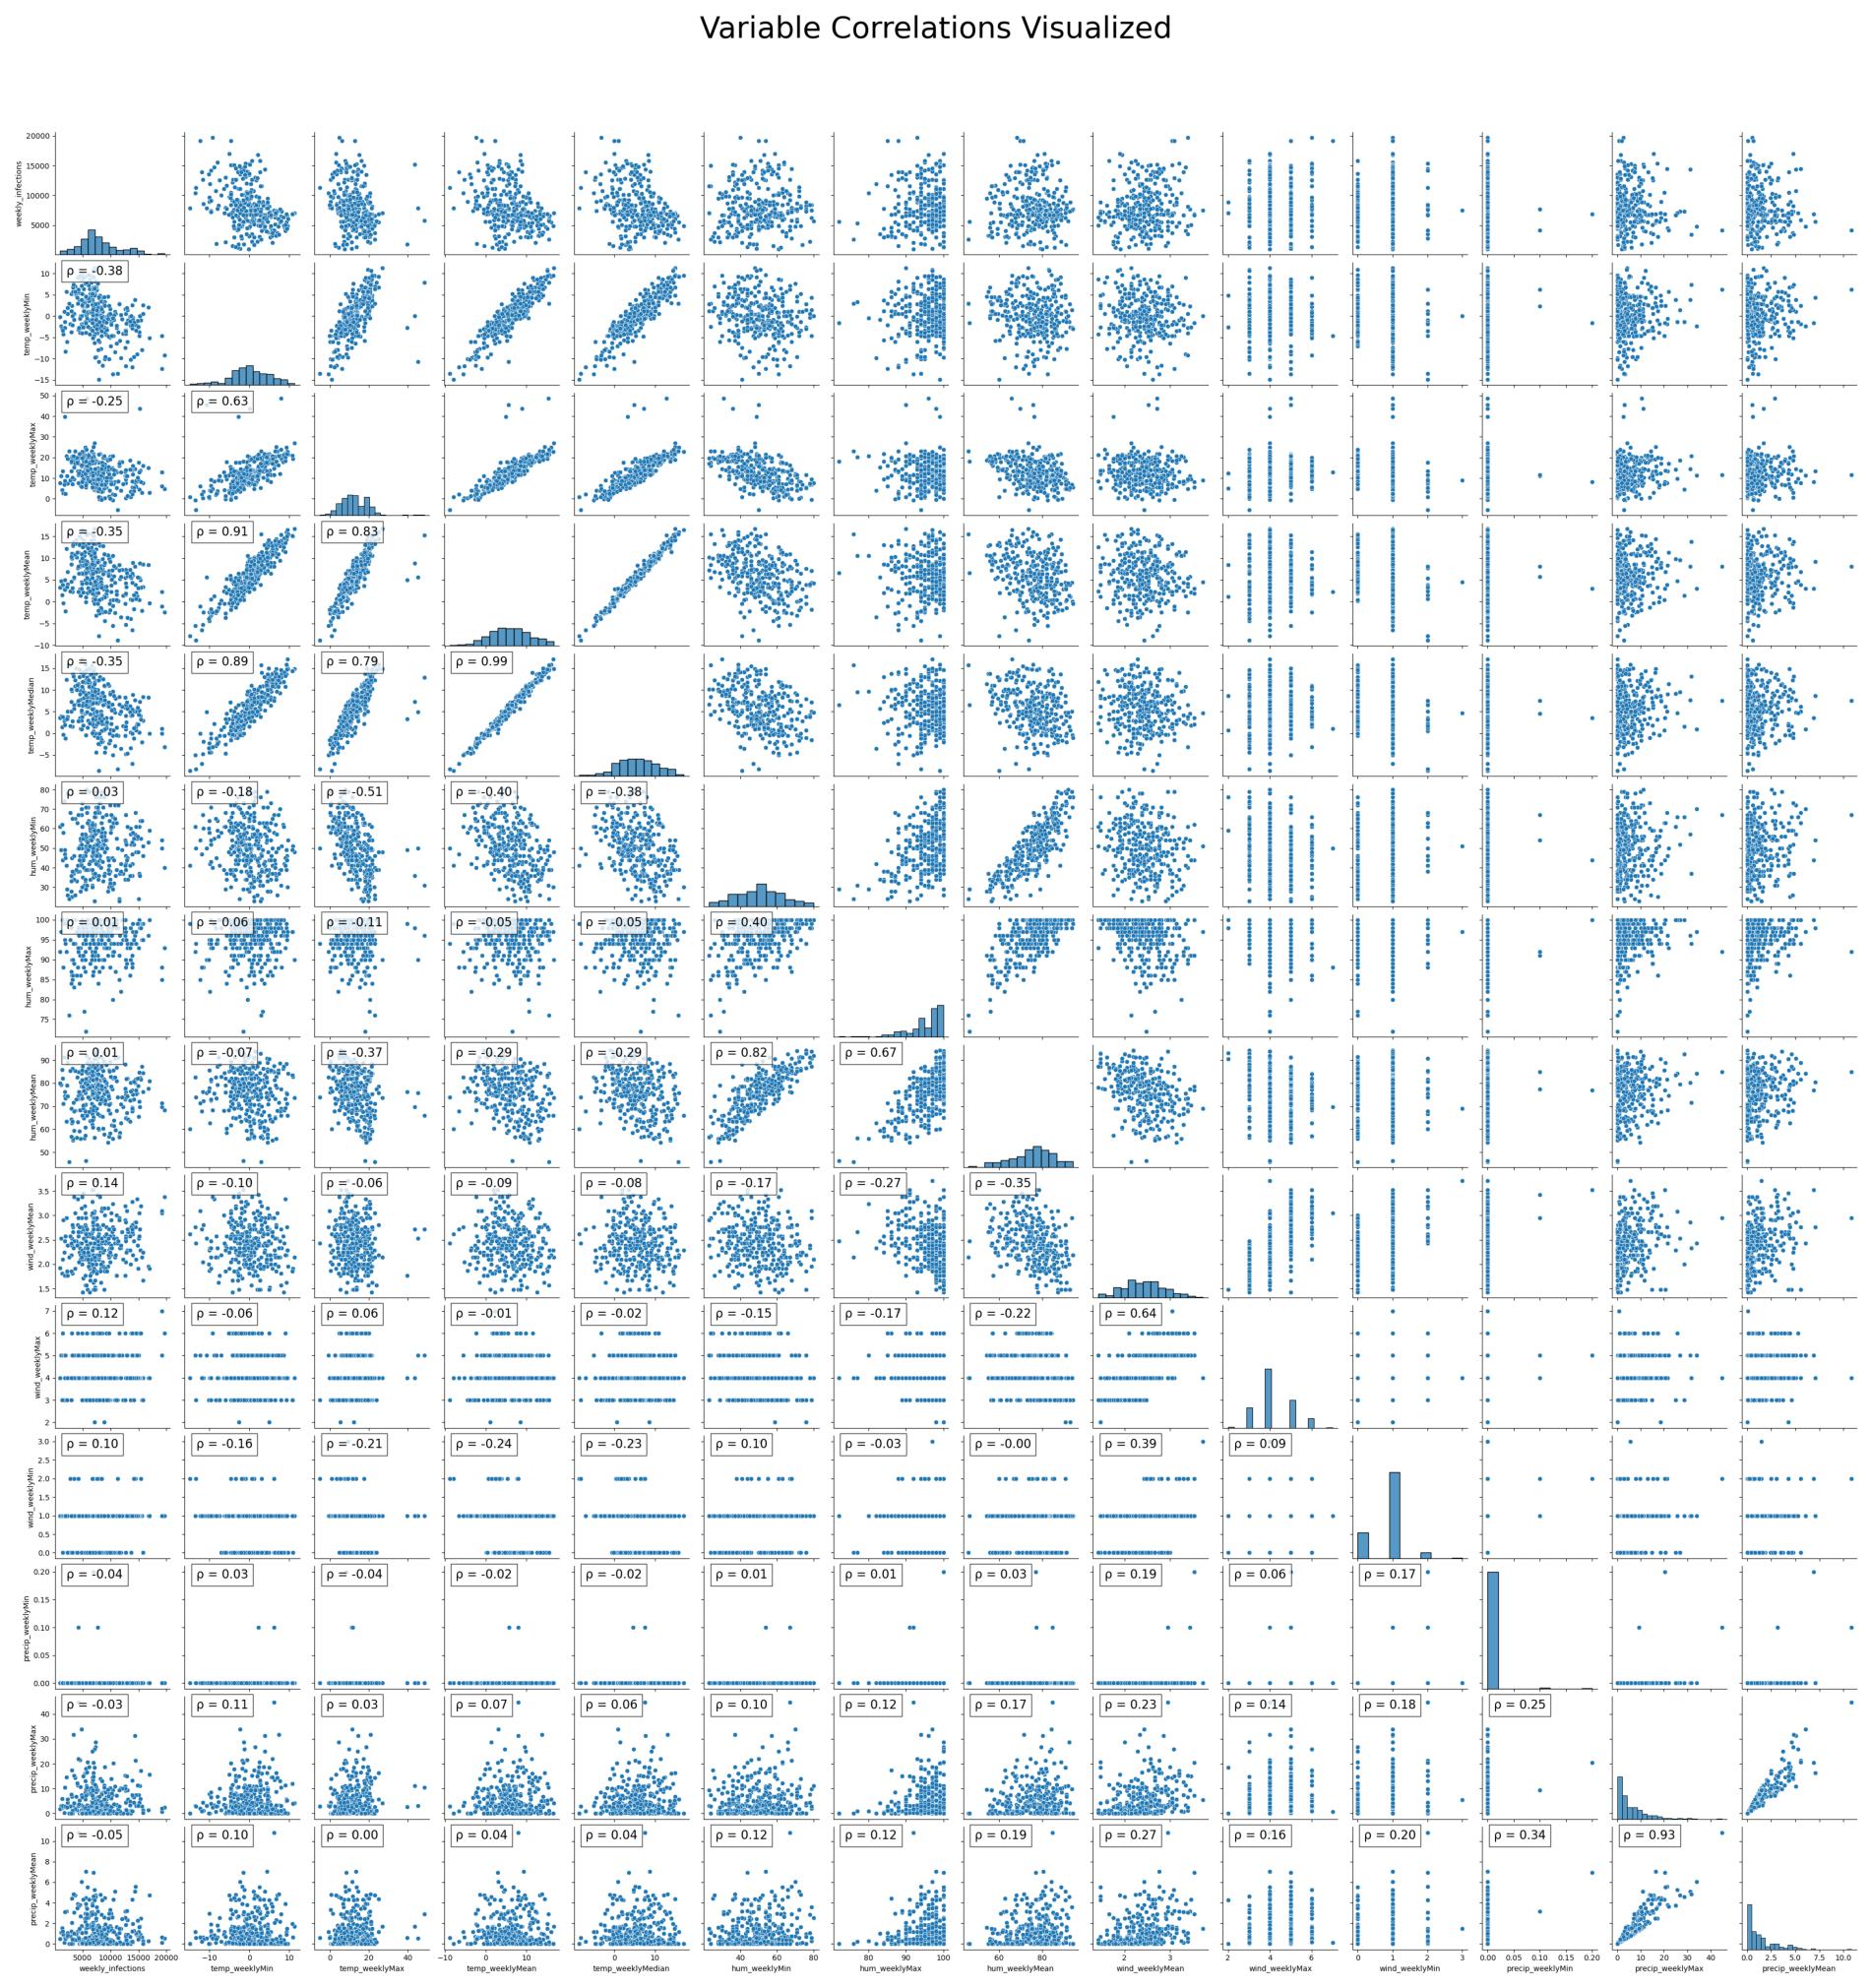

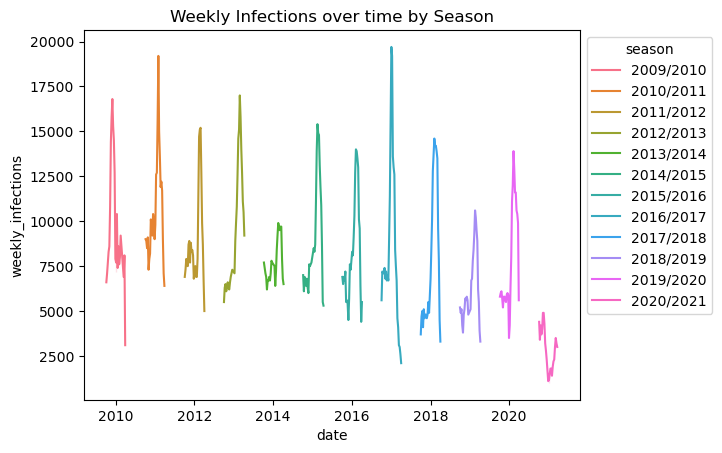

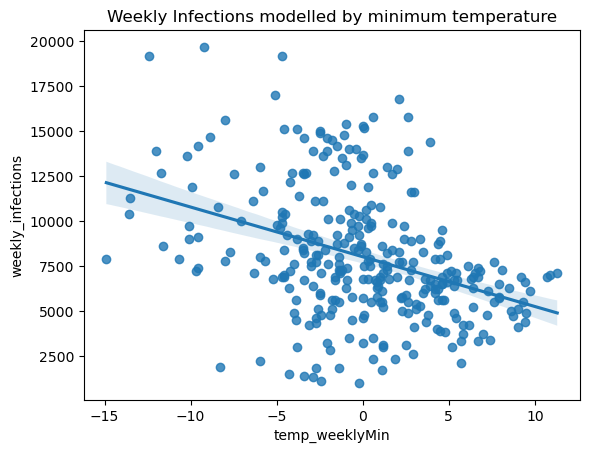

In [8]:
# YOUR CODE HERE
import matplotlib.image as mpimg

def get_date_from_year_and_week(year: int, week: int) -> datetime.datetime:
        # Code adapted from Martjin Pieters: https://stackoverflow.com/questions/17087314/get-date-from-week-number
        string_date = f"{year}-{week}"
        parsed_date = datetime.datetime.strptime(string_date + '-1', "%Y-%W-%w")
        return parsed_date

# Method used for rendering and saving the pairplot
# cannot use in final assignement as it crashes nb grader
# so i prerendered the plot and now simply display the saved image
# also see: https://tuwel.tuwien.ac.at/mod/forum/discuss.php?d=342115
def render_pair_plot():
    g = sns.pairplot(data_processed)

    def corrfunc(x, y, hue=None, ax=None, **kws):
        # all credit for this function goes to iacob and Binxu Wan on Stackoverflow: https://stackoverflow.com/questions/50832204/show-correlation-values-in-pairplot-using-seaborn-in-python
        """Plot the correlation coefficient in the top left hand corner of a plot."""
        r, _ = scipy.stats.pearsonr(x, y)
        ax = ax or plt.gca()
        l = ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
        l.set_bbox(dict(facecolor='white', alpha=0.8))
        l.set_fontsize(16)

    g.map_lower(corrfunc)
    g.fig.suptitle("Variable Correlations Visualized", y = 1.05, fontsize=40)
    g.savefig("pairplot.png")
    plt.clf()

def plot_pair():
    img = mpimg.imread('pairplot.png')
    fig = plt.figure(figsize=[20, 20])
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(img)

    plt.show()
    
def plot_season():
    df_with_date = data_processed.copy()

    df_with_date["date"] = df_with_date.apply(lambda r: get_date_from_year_and_week(r.name[0], r.name[1]), axis = 1)

    def get_season(year: int, week: int):
        if week < 30:
            return f"{year-1}/{year}"
        else:
            return f"{year}/{year+1}"

    df_with_date["season"] = df_with_date.apply(lambda r: get_season(int(r.name[0]), int(r.name[1])), axis = 1)

    ax = sns.lineplot(data = df_with_date, x = df_with_date.date, y = df_with_date.weekly_infections, hue = df_with_date.season)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title("Weekly Infections over time by Season")
    plt.show()

def plot_reg():
    sns.regplot(data_processed, x = data_processed.temp_weeklyMin, y = data_processed.weekly_infections)
    plt.title("Weekly Infections modelled by minimum temperature")
    plt.show()
    
#render_pair_plot()
plot_pair()
plot_season()
plot_reg()

In [11]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!

#### Findings 
Summarize your findings, and explain:
1. What kind of plots did you use, and why.
2. What kind of behaviour can you identify for our variable of interest `weekly_infections`
3. Provide at least two observations regarding correlations of `weekly_infections` with weather features. Focus on the interesting facts, i.e. two times "X does not correlate with Y" will not result in full points!

ANSWER:

#### 1. What kind of plots did you use, and why.

Firstly I used a pairplot ("Variable Correlations Visualized") of all variables to analyze distributions of teh variables and their correlations.
I like this kind of plot as it gives you a very broad overview of the variables that are available to you.
Its easy to get lost on this plot and a larger monitor is advantageous.
The lefternmost column of the plot is the most important as it outlines the correlations between our variable of interest `weekly_infections` and the independent variables.

For my second plot I went with a time series visualization.
I wanted to explore our dependent variable `weekly_infections` on its own and see how it develops over time.
What I utilized here was the already present seasonal nature of the data.

For my last plot I wanted to highlight how one interesting variable `temp_weeklyMin` relates to our variable of interest `weekly_infections`.
The regplot basically shows us how a linear model with just the `temp_weeklyMin` variable as a predictor would work.
There are also confidence bands around the regression line.
These are made using bootstrap.

#### 2. What kind of behaviour can you identify for our variable of interest `weekly_infections`

Our variable of interest has a clear seasonal progression.
It reaches a seasonal high and drops towards the end.
We can see this nicely in the "Weekly Infections over time by Season" plot.
We can also see that "2020/2021" is an outlier and has a much flatter curve.
Its reasonable to assume this is due to COVID-19 taking center stage in that time.

#### 3. Provide at least two observations regarding correlations of `weekly_infections` with weather features. Focus on the interesting facts, i.e. two times "X does not correlate with Y" will not result in full points!

What is really interesting is that `weekly_infections` has the highest correlations to temperature related data like `temp_weeklyMin`, `temp_weeklyMax`, `temp_weeklyMean` and `temp_weeklyMedian`.
These correlations are all (obviously) negative.
As it gets colder people get more influenza.

Another noteworthy, if not very pronounced, correlation (p = 0.14) is `wind_weeklyMean`.

What is also important to note is the high, somewhat expected, correlation between `temp_weeklyMean` and `temp_weeklyMedian` for example.
There are many variables like these that are very related due to obvious reasons.
Its important to not it however since including two of these variables in the same linear model would lead to multicollinearity.
Multicollinearity makes linear models very unstable!

Values that relate to the precipitation don't really seem to influence the `weekly_infections` variable.

## Task 7: Influenza infections prediction model (20 Points)

Build and train a model using weather and influenza data using `scikit-learn`.
In this task we will:

* Split off a hidden test subset for final testing (used in task 8)
* Split the development data into train and validation splits.
* Choose suitable ML methods
* Choose suitable metrics
* Choose suitable feature preprocessing steps (feature scaling and selection)
* Run and evaluate trainings with different parametern settings 


This task has the following sub-tasks, and points are distributed as indicated:

1. Separate holdout test data **2 points**
1. First ML experiments - **6 points**
1. Explore different scaling approaches - **4 points**
1. Experiment with different feature selection methods - **4 points**
1. Develop optimal pipeline - **4 points**

General advices:
- Make sure your results are reproducible, i.e. set the random seed whenever possible/necessary.
- Don't hesitate to go back to previous steps if you notice anything that needs changing.


### 7.1 Separate holdout test data

In this task we will split the `data_processed` DataFrame into a development and a hidden test dataset. The development dataset will be used for experimentation and developing a ML model (we will further split it into train and validation subsets later).
The hidden test set represent a hidden holdout test set, which we will use in the very end of the notebook to test the developed approach.
Implement the function in the cell below to separate the development and hidden test sets:
- Development set: all data until summer 2020 (we can use week 25 as split point)
- Hidden test set: winter season of 2020/2021 (everything remaining after week 25 in 2020)


In [12]:
def split_data(df:pd.DataFrame) -> typing.Tuple[pd.DataFrame, pd.DataFrame]:
    """ 
    Split the hidden test set from the dataframe in df. Any rows after week 25
    of 2020 should be put in df_hidden_test (the hidden test set) and removed from 
    df_develop.

    Parameters
    --------
    df: dataframe containing full dataset
    
    Returns
    --------
    df_develop: dataframe with rows until (including) week 25 of 2020
    df_hidden_test: dataframe with rows from week 25 of 2020
    """
    df_develop = df.copy().loc[(2009,40):(2020, 25)]
    df_hidden_test = df.copy().loc[(2020, 26):(2020, 53)]

    return df_develop, df_hidden_test

In [13]:
# DO NOT MODIFY OR COPY THIS CELL!!
data_develop, data_hidden_test = split_data(data_processed)

# visualize split boundary
print("Train tail:")
display(data_develop.tail())
print("\nTest head:")
display(data_hidden_test.head())

Train tail:


weekly_infections  temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  \
year week                                                                       
2020 9                 11600             2.8            17.0         7.209524   
     10                10600             0.2            13.9         8.147619   
     11                10400            -0.5            20.6        10.504762   
     12                 9900             0.5            19.2         9.195238   
     13                 5600            -1.6            18.2         6.538095   

           temp_weeklyMedian  hum_weeklyMin  hum_weeklyMax  hum_weeklyMean  \
year week                                                                    
2020 9                   6.6             23             91       56.476190   
     10                  8.7             32             94       61.571429   
     11                  9.6             29             80       55.761905   
     12                  9.0             32             88       58.238095   
     13                  6.5             29             72       46.333333   

           wind_weeklyMean  wind_weeklyMax  wind_weeklyMin  precip_weeklyMin  \
year week                                                                      
2020 9            2.904762               5               1               0.0   
     10           2.714286               4               1               0.0   
     11           3.238095               5               1               0.0   
     12           2.238095               4               0               0.0   
     13           2.476190               4               1               0.0   

           precip_weeklyMax  precip_weeklyMean  
year week                                       
2020 9                  9.3           1.471429  
     10                 3.8           1.185714  
     11                 1.0           0.285714  
     12                 1.1           0.200000  
     13                 0.0           0.000000


Test head:


weekly_infections  temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  \
year week                                                                       
2020 40                 4400             9.4            21.7        15.071429   
     41                 3400             7.4            20.8        13.714286   
     42                 4200             6.2            11.7         8.023810   
     43                 3700             5.8            17.1        10.785714   
     44                 4000             4.3            17.7        11.264286   

           temp_weeklyMedian  hum_weeklyMin  hum_weeklyMax  hum_weeklyMean  \
year week                                                                    
2020 40                 14.8             44             96       75.190476   
     41                 13.1             37             94       71.428571   
     42                  7.5             67             92       84.761905   
     43                 10.9             65            100       85.333333   
     44                 11.1             63             97       82.428571   

           wind_weeklyMean  wind_weeklyMax  wind_weeklyMin  precip_weeklyMin  \
year week                                                                      
2020 40           2.761905               4               1               0.0   
     41           2.333333               4               1               0.0   
     42           2.952381               4               2               0.1   
     43           1.904762               4               1               0.0   
     44           2.380952               4               0               0.0   

           precip_weeklyMax  precip_weeklyMean  
year week                                       
2020 40                 5.2           1.500000  
     41                31.6           4.842857  
     42                44.8          10.842857  
     43                 1.7           0.371429  
     44                12.1           3.471429

In [14]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!
assert data_develop.shape[1] == data_hidden_test.shape[1], "Both dataframes should have the same number of columns!!"
assert data_develop.shape[1] == data_processed.shape[1], "All columns should be retained!!"

assert data_develop.shape[0] < data_processed.shape[0], "data_develop should be a subset of data_processed, so it should have less rows!"
assert data_hidden_test.shape[0] < data_processed.shape[0], "data_hidden_test should be a subset of data_processed, so it should have less rows!"


### 7.2 First ML experiments

In this task we will train a first ML model from sklearn on the training dataset. 
In order to train and validate a machine learning model, we need a set of training samples, and some validation data.
We want to treat the 2020/2021 season data that we split off in task 7.1 as "hidden test data", so we do not want to touch it in the experiments to choose and optimize our ML model. Instead we split off another small validation set from our training data.


#### Create train and validation data
- Split `data_develop` into a train and validation sets. 
- Randomly choose which rows should end up in train and eval subsets.
- Separate the weather features from the target values (weekly influenza cases `weekly_infections`). `X_` variables should contain features while `y_` variables contain the target values.

In [15]:
import sklearn.model_selection

def create_dataset(df:pd.DataFrame, valid_size:float, 
                   random_state:int) -> typing.Tuple[pd.DataFrame, pd.Series, 
                                                 pd.DataFrame, pd.Series]:

    """ 
    Split the training data in to train X,y and valid X,y sets.
    The Xs (X_train and X_valid) should be dataframes containing feature columns.
    The ys (y_train, y_valid) should be series containing the weekly_infections column.

    Parameters
    --------
    df: dataframe containing training dataset
    valid_size: float [0..1] indicating the percentage of rows used for the valid set.
    random_state: int seed for random number generator (to make experiments deterministic)
    
    Returns
    --------
    X_train: dataframe with training features
    y_train: series with corresponding training target values (weekly_infections)
    X_valid: dataframe with validation features
    y_test: series with corresponding validation target values (weekly_infections)
    """
    X_train = None
    X_valid = None
    y_train = None
    y_valid = None

    # YOUR CODE HERE

    X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
        df.copy().loc[:, ("temp_weeklyMin", 
                          "temp_weeklyMax", 
                          "temp_weeklyMean", 
                          "temp_weeklyMedian", 
                          "hum_weeklyMin", 
                          "hum_weeklyMax", 
                          "hum_weeklyMean", 
                          "wind_weeklyMean", 
                          "wind_weeklyMax", 
                          "wind_weeklyMin", 
                          "precip_weeklyMin", 
                          "precip_weeklyMax", 
                          "precip_weeklyMean")],
        df.copy().loc[:, "weekly_infections"],
        random_state = random_state,
        test_size = valid_size
    )
    
    return X_train, y_train, X_valid, y_valid

In [16]:
# DO NOT MODIFY OR COPY THIS CELL!!
valid_split = 0.2
X_train, y_train, X_valid, y_valid = create_dataset(data_develop, valid_size=valid_split, random_state=42)

In [17]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!
assert isinstance(X_train, pd.DataFrame), "X data should be a DataFrame with multiple columns!"
assert isinstance(X_valid, pd.DataFrame), "X data should be a DataFrame with multiple columns!"

assert isinstance(y_train, pd.Series), "Y data should be a Series with a single columns!"
assert isinstance(y_valid, pd.Series), "Y data should be a Series with a single columns!"

assert X_train.shape[0] <= data_develop.shape[0] * (1 - valid_split+0.05), "Number of rows should match the valid_split size (plus a small tolerance)!"
assert X_valid.shape[0] <= data_develop.shape[0] * (valid_split+0.05), "Number of rows should match the valid_split size (plus a small tolerance)!"

assert y_train.shape[0] == X_train.shape[0], "Number of rows should stay the same for x and y!"
assert y_valid.shape[0] == X_valid.shape[0], "Number of rows should stay the same for x and y!"

assert len(y_train.shape) == 1, "Y data should be a Series with a single columns!"
assert len(y_valid.shape) == 1, "Y data should be a Series with a single columns!"

assert X_train.index.equals(y_train.index), "X and y train data must match!"
assert X_valid.index.equals(y_valid.index), "X and y valid data must match!" 


#### Identify suitable ML methods

Now that we have training and validation data, select an appropriate ML method and train it using the data.
It might help to go back to the visualization task and think about what kind of data we are dealing with, and what the task of the ML model should be.

- Identify **at least three** suitable ML methods from sklearn and add them to the list in the code block below.

In [18]:
from sklearn import ensemble

def get_suitable_ml_methods() -> typing.List[typing.Type[sklearn.base.BaseEstimator]]:
    """ 
    Create a list of sklearn machine learning model classes that are suitable
    for the task at hand. Return the actual type/class 
    (e.g. sklearn.neighbors.KNeighborsTransformer), not an instance/object 
    (do NOT instanciate the classes: KNeighborsTransformer() )
    
    Returns
    --------
    suitable_methods: list of types (classes) for suitable sklearn machine learning models.)
    """
    suitable_methods = []

    # example (you can delete the these three lines, they are just a demonstration):
    import sklearn.neighbors
    suitable_methods.append(sklearn.neighbors.KNeighborsTransformer) # this is not a suitable model!!
    suitable_methods.clear() # let's clear the list again since the model is not suitable

    # add at least three suitable methods:
    # YOUR CODE HERE
    suitable_methods.append(sklearn.linear_model.LinearRegression)
    suitable_methods.append(sklearn.svm.SVR)
    suitable_methods.append(sklearn.ensemble.RandomForestRegressor)

    return suitable_methods

In [19]:
# DO NOT MODIFY OR COPY THIS CELL!!
# small helper function to show selected method classes:
def print_selection(selected: list, sel_type:str='methods'):
    print(f"Identified {sel_type}:\n===================\n"+ 
           '\n'.join([cur_sel.__name__ for cur_sel in selected 
                 if hasattr(cur_sel, '__name__')]))

In [20]:
# DO NOT MODIFY OR COPY THIS CELL!!
suitable_ml_methods = get_suitable_ml_methods()
print_selection(suitable_ml_methods)

Identified methods:
LinearRegression
SVR
RandomForestRegressor


In [21]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!
assert len(suitable_ml_methods) >= 3

for cur_method in suitable_ml_methods:
    assert inspect.isclass(cur_method), \
            f"{cur_method} is not a class! Return the classes not an instance!"

for cur_method in suitable_ml_methods:
    assert cur_method.__module__.startswith('sklearn'),  \
            f"{cur_method} is not in sklearn! Only use classes from sklearn!"


#### Train a ML model

Now that we have data and suitable methods, let's train a model!
- Train a ML method on the train subset (`X_train`, `y_train`) and return the trained model.

In [22]:
def train_model(X_train:pd.DataFrame, y_train:pd.Series, 
                model_class: typing.Type[sklearn.base.BaseEstimator]
                ) -> sklearn.base.BaseEstimator:

    trained_model = model_class()  # instanciate sklearn model to be trained

    # train the model:

    # YOUR CODE HERE
    trained_model = trained_model.fit(X_train, y_train)

    # return the trained model:
    return trained_model


In [23]:
model_idx = 0  # you can choose different models from your list of suitable models here

In [24]:
# DO NOT MODIFY OR COPY THIS CELL!!
choosen_method_class = suitable_ml_methods[model_idx]
print(f"Choosen method: {choosen_method_class.__name__}")

trained_model = train_model(X_train, y_train, choosen_method_class)
print("Model trained!")

Choosen method: LinearRegression
Model trained!


In [25]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!

assert sklearn.utils.validation.check_is_fitted(trained_model) == None, "Model was not trained!"  # throws exception if not trained!


#### Identify suitable metrics

In order to quantify the quality of the trained model we need a metric to  calculate a performance.
Similarly as above with the ML methods, here, identify at least three metrics from `sklearn.metrics` that are suitable for the task at hand.
Add them to the list below:

In [26]:
def get_suitable_metrics() -> typing.List[typing.Callable]:
    """ 
    Create a list of sklearn metric functions that are suitable
    for the task at hand. Return the actual function 
    (e.g. sklearn.metrics.accuracy_score )
    
    Returns
    --------
    suitable_methods: list of types (classes) for suitable sklearn machinelearning models.)
    """
    suitable_metrics = []

    # example (you can delete these two lines, they are just a demonstration):
    suitable_metrics.append(sklearn.metrics.accuracy_score) # this is not a suitable metric!!
    suitable_metrics.clear() # let's clear the list again since the metric is not suitable

    # add at least three suitable metrics:
    # YOUR CODE HERE
    suitable_metrics.append(sklearn.metrics.mean_squared_error)
    suitable_metrics.append(sklearn.metrics.mean_absolute_error)
    suitable_metrics.append(sklearn.metrics.r2_score)

    return suitable_metrics

In [27]:
# DO NOT MODIFY OR COPY THIS CELL!!
suitable_metrics = get_suitable_metrics()
print_selection(suitable_metrics, 'metrics')

Identified metrics:
mean_squared_error
mean_absolute_error
r2_score


In [28]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!

assert len(suitable_metrics) >= 3

for cur_metric in suitable_metrics:
    assert inspect.isfunction(cur_metric), \
    f"{cur_metric} is not a function! Add the functions directly to the list!"

for cur_metric in suitable_metrics:
    assert cur_metric.__module__.startswith('sklearn'), \
            f"{cur_metric} is not in sklearn! Only use functions from sklearn!"


#### Predict on validation set and calculate performance

Implement the function below:
* Predict using the provided features and the trained model.
* Calculate the evaluation metric using the provided metric_func.

In [29]:
def predict_and_eval(trained_model: sklearn.base.BaseEstimator, 
                     metric_func: typing.Callable, 
                     X_valid: pd.DataFrame, 
                     y_true: pd.Series) -> typing.Tuple[np.ndarray, float]:
    """ 
    Predict `weekly_infections` for X_valid using trained_model. Store the 
    prediction in y_pred. 
    Then calculate the performance using the provided metric_func, by calling it
    with y_true and y_pred. Watch out, the order of y_true and y_pred may
    make a difference!! 
    
    Returns
    --------
    y_pred: np.ndarray of predictions for weekly_infections from X_valid features
    metric_result: float, the result of metric_func for the generated predictions y_pred
                   compared to true values y_true.
    """
    y_pred = None
    metric_result = None

    # predict using trained_model and X_valid
    # then calculate the performance using the predicted values y_pred and the 
    # expected actual values y_true

    # YOUR CODE HERE
    y_pred = trained_model.predict(X_valid)
    metric_result = metric_func(y_true, y_pred)

    return y_pred, metric_result

In [30]:
metric_idx = 2 # you can choose different metrics from your list of suitable metrics here

In [31]:
# DO NOT MODIFY OR COPY THIS CELL!!
choosen_metric_func = suitable_metrics[metric_idx]
print(f"Choosen metric: {choosen_metric_func.__name__}")

y_pred, metric_result = predict_and_eval(trained_model, choosen_metric_func, X_valid, y_valid)

print(f"Result for {choosen_method_class.__name__} and {choosen_metric_func.__name__}: {metric_result:3f}")

Choosen metric: r2_score
Result for LinearRegression and r2_score: 0.192178


In [32]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!
assert y_pred.shape[0] == y_valid.shape[0], "Predictions for each row!"
assert len(y_pred.shape) == 1, 'only one value per row!'


#### Compare models
Now run the training and validation for all models that you identified earlier.
Implement the method below to:
- Iterate over the different ML methods in `suitable_methods` 
- Use all of the metrics identified in `suitable_metrics` for each method to calculate one result. 
- Return the scores for each method and metric in a dictionary with model names + metric names as keys and the performance values as values. 
- This way, you should generate at least 3 x 3 = 9 performance values (at least 3 methods and 3 metrics)
- You may, but you do not have to reuse the functions we created already.

In [33]:
def compare_methods(method_classes: typing.List[typing.Type[sklearn.base.BaseEstimator]],
                    metric_functions: typing.List[typing.Callable],
                    X_train: pd.DataFrame, y_train:pd.Series,
                    X_valid: pd.DataFrame, y_valid: pd.Series
                    ) -> typing.Dict[str, float]:
    """ 
    Run the provided methods in method_classes on the provided data and evaluate
    them using the provided metric_functions. Calculate all metric functions
    for each provided method.
    
    Returns
    --------
    scores: Dictionary with names (strings) as keys (method+metric name) and 
            the calculated performance metric values as values.
    """

    scores = {} # dict of metric name -> metric value/score

    # YOUR CODE HERE
    for model_class in method_classes:
        trained_model = train_model(X_train, y_train, model_class)
        for metric_func in metric_functions:
            y_pred, metric_result = predict_and_eval(trained_model, metric_func, X_valid, y_valid)
            scores[f"{model_class.__name__}-{metric_func.__name__}"] = metric_result

    # you can also print the results in this function, if you want to format them more nicely!
    return scores

In [34]:
# DO NOT MODIFY OR COPY THIS CELL!!
def print_scores(scores: typing.Dict[str, float]):
    print("\nScores:\n=======")
    for metric_name, metric_value in scores.items():
        print(f"{metric_name}: {metric_value:.4f}")

In [35]:
# DO NOT MODIFY OR COPY THIS CELL!!
model_scores = compare_methods(suitable_ml_methods, suitable_metrics, X_train, y_train, X_valid, y_valid)
print_scores(model_scores)


Scores:
LinearRegression-mean_squared_error: 7334723.2778
LinearRegression-mean_absolute_error: 2159.3430
LinearRegression-r2_score: 0.1922
SVR-mean_squared_error: 9651552.7971
SVR-mean_absolute_error: 2430.8718
SVR-r2_score: -0.0630
RandomForestRegressor-mean_squared_error: 7711856.1228
RandomForestRegressor-mean_absolute_error: 2123.0000
RandomForestRegressor-r2_score: 0.1506


Think about which model performed best. Beware that for some metrics, bigger numbers indicate better performance (quality metrics) and for others smaller numbers indicate better performance (error metrics)!!

In [36]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!
assert len(model_scores) == len(suitable_ml_methods) * len(suitable_metrics), "You should generate one result per method and metric!"


### 7.4 Explore different scaling approaches
For some machine learning methods, the value ranges of the feature data can have a hughe impact on convergence and performance. Usually, it is best to normalize the value ranges of the individual features. In sklearn this is achieved using so called scalers.

- Use one ML method from your selection, for which a feature normalization would make a difference (you can try out different ones and also go back and add one if necessary). 
- Compare three different scaling methods.
- Find a combination of model + scaler where the performance improves using a scaler.

#### Identify suitable scaler classes
First, identify suitable scaler classes for our features and task.
Implement the function below and return at least three suitable scaling methods.

In [37]:
def get_suitable_scalers(
                ) -> typing.List[typing.Type[sklearn.base.TransformerMixin]]:
    """ 
    Create a list of sklearn metric functions that are suitable
    for the task at hand. Return the actual class and do not create instances! 
    (e.g. sklearn.preprocessing.KBinsDiscretizer)
    
    Returns
    --------
    suitable_scalers: list of types (classes) for suitable sklearn machinelearning models.)
    """
    suitable_scalers = []

    # example (you can delete these two lines, they are just a demonstration):
    suitable_scalers.append(sklearn.preprocessing.KBinsDiscretizer) # this is not a suitable scaler!!
    suitable_scalers.clear() # let's clear the list again since the scaler is not suitable

    # add at least three suitable scaler:
    # YOUR CODE HERE
    suitable_scalers.append(sklearn.preprocessing.StandardScaler)
    suitable_scalers.append(sklearn.preprocessing.MinMaxScaler)
    suitable_scalers.append(sklearn.preprocessing.MaxAbsScaler)

    return suitable_scalers

In [38]:
# DO NOT MODIFY OR COPY THIS CELL!!
suitable_scalers = get_suitable_scalers()

In [39]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!
assert len(suitable_scalers) >= 3

for cur_scaler in suitable_scalers:
    assert inspect.isclass(cur_scaler), \
            f"{cur_scaler} is not a class! Return the classes not an instance!"

for cur_scaler in suitable_scalers:
    assert cur_scaler.__module__.startswith('sklearn'),  \
            f"{cur_scaler} is not in sklearn! Only use classes from sklearn!"


#### Create a pipeline with a scaler class

Implement the function below to train a sklearn pipleine using a scaler and a model class provided in the parameters.

In [40]:
from sklearn.pipeline import make_pipeline

def train_pipeline(X_train: pd.DataFrame, 
                    y_train: pd.DataFrame, 
                    model_class: typing.Type[sklearn.base.BaseEstimator], 
                    scaler_class: typing.Type[sklearn.base.TransformerMixin]
                   ) -> sklearn.base.BaseEstimator:
    """ 
    Build a sklearn pipeline (make_pipeline) consisting of the provided scaler
    (scaler_class) and model (model_class). Then train it using the provided
    training data X_train and y_train. Return the trained model pipeline.
    
    Returns
    --------
    trained_model: Trained model pipeline
    """
    # build a sklearn pipeline using the scaler and the model 
    # and train the pipeline

    # YOUR CODE HERE
    pipe = make_pipeline(scaler_class(), model_class())
    trained_model = pipe.fit(X_train, y_train)
    
    return trained_model

Select model, scaler and metric and run the pipeline:

In [41]:
model_idx = 0
metric_idx = 2
scaler_idx = 1

In [42]:
# DO NOT MODIFY OR COPY THIS CELL!!
choosen_method_class = suitable_ml_methods[model_idx]
choosen_metric_func = suitable_metrics[metric_idx]
choosen_scaler = suitable_scalers[scaler_idx]
print(f"Choosen method: {choosen_method_class.__name__}")
print(f"Choosen metric: {choosen_metric_func.__name__}")
print(f"Choosen scaler: {choosen_scaler.__name__}")

trained_model = train_pipeline(X_train, y_train, choosen_method_class, choosen_scaler)
y_pred, metric_result = predict_and_eval(trained_model, choosen_metric_func, X_valid, y_valid)

print(f"Result for {choosen_method_class.__name__} and {choosen_metric_func.__name__}: {metric_result:3f}")

Choosen method: LinearRegression
Choosen metric: r2_score
Choosen scaler: MinMaxScaler
Result for LinearRegression and r2_score: 0.192178


#### Compare scalers
Now compare the suitable scaler methods, by calculating the results for the selected model in combination with no scaler, and the two different scaler methods (three results in total).
* Implement the method below to compare the performance of scaled features vs non scaled features
* Return the scores as a dictionary with string names (scaler name) as keys and performance metric results as values

In [43]:
def compare_scaling(X_train: pd.DataFrame, 
                    y_train: pd.DataFrame, 
                    X_valid: pd.DataFrame, 
                    y_valid: pd.DataFrame, 
                    method_class: typing.Type[sklearn.base.BaseEstimator], 
                    metric_func: typing.Callable, 
                    scalers_list: typing.List[typing.Type[sklearn.base.TransformerMixin]]
                    ) -> typing.Dict[str, float]:
    """ 
    Calculate performance metrics for the provided method class. First without
    scaler and then with each of the scalers in scalers_list. Use the provided
    metric_func for calculation a performance metric!
    
    Returns
    --------
    scores: Dictionary with names (strings) as keys (scaler name) and 
            the calculated performance metric values as values.
    """

    scores = {} # a dictionary containing the results as values, and a textual description (string) of the used scaler and model as keys.

    # YOUR CODE HERE
    trained_models = {}
    
    trained_models["NO_SCALER"] = train_model(X_train, y_train, method_class)

    for scaler_class in scalers_list:
        trained_models[scaler_class.__name__] = train_pipeline(X_train, y_train, method_class, scaler_class)
        
    for scaler_name, trained_model in trained_models.items():
        y_pred, metric_result = predict_and_eval(trained_model, metric_func, X_valid, y_valid)
        scores[f"{method_class.__name__}-{scaler_name}"] = metric_result

    return scores

In [44]:
# DO NOT MODIFY OR COPY THIS CELL!!
scaling_scores = compare_scaling(X_train, y_train, X_valid, y_valid, 
                                 choosen_method_class, choosen_metric_func, suitable_scalers)
print_scores(scaling_scores)


Scores:
LinearRegression-NO_SCALER: 0.1922
LinearRegression-StandardScaler: 0.1922
LinearRegression-MinMaxScaler: 0.1922
LinearRegression-MaxAbsScaler: 0.1922


In [45]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!
assert len(scaling_scores) >= 4, "Calculate results for each scaler and one without!"

#### Select scaler
Select a scaling methd that actually improves the performance of the model that you selected!

In [46]:
# select a combination of model, metric, and scaler, where the scaler actually improves performance!!
model_idx = 1
metric_idx = 0
scaler_idx = 1

In [47]:
# DO NOT MODIFY OR COPY THIS CELL!!
choosen_method_class = suitable_ml_methods[model_idx]
choosen_metric_func = suitable_metrics[metric_idx]
choosen_scaler = suitable_scalers[scaler_idx]
print(f"Choosen method: {choosen_method_class.__name__}")
print(f"Choosen metric: {choosen_metric_func.__name__}")
print(f"Choosen scaler: {choosen_scaler.__name__}")

# run without scaler
trained_model_plain = train_model(X_train, y_train, choosen_method_class)
y_pred_plain, metric_result_plain = predict_and_eval(trained_model_plain, choosen_metric_func, X_valid, y_valid)

# run with scaler
trained_model_scaled = train_pipeline(X_train, y_train, choosen_method_class, choosen_scaler)
y_pred_scaled, metric_result_scaled = predict_and_eval(trained_model_scaled, choosen_metric_func, X_valid, y_valid)
print(f"{choosen_metric_func.__name__} for method {choosen_method_class.__name__}  \n" \
      f"plain: {metric_result_plain:.4f} \nwith scaler {choosen_scaler.__name__}:  {metric_result_scaled:.4f}")

Choosen method: SVR
Choosen metric: mean_squared_error
Choosen scaler: MinMaxScaler
mean_squared_error for method SVR  
plain: 9651552.7971 
with scaler MinMaxScaler:  9637742.5452


In [48]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!

assert metric_result_scaled != metric_result_plain

if 'score' in choosen_metric_func.__name__.lower():
    assert metric_result_scaled > metric_result_plain, "Score for scaled version should be better!"
else:
    assert metric_result_scaled < metric_result_plain, "Error for scaled version should be lower!"


### 7.5 Experiment with different feature selection methods

Some ML approaches are sensitive to the number of feature dimensions, i.e. their performance might worsen if unnecessarily many features are used.
In order to check if we can further improve performance, try two feature selection methods and compare the performance to using no features selection method.

#### Implement VarianceThreshold feature selection
Implement the function below to apply the `VarianceThreshold` feature selection method to the train and validation features!

In [49]:
from sklearn.feature_selection import VarianceThreshold

def apply_variance_threshold_feature_selection(X_train: pd.DataFrame,  
                                                X_valid: pd.DataFrame, 
                                               threshold: float,
                                ) -> typing.Tuple[pd.DataFrame, pd.DataFrame]:
    """ 
    Apply the VarianceTrheshold feature selection method to X_train and 
    X_vaild.

    Parameters
    --------
    threshold: float, threshold to be used for VarianceThreshold feature selector

    Returns
    --------
    X_train_sel: dataframe, selected columns from X_train
    X_valid_sel: dataframe, selected columns from X_valid

    """
    X_train_sel = None
    X_valid_sel = None

    # YOUR CODE HERE
    selector = VarianceThreshold(threshold = threshold).fit(X_train)
    X_train_sel = selector.transform(X_train)
    X_valid_sel = selector.transform(X_valid)
    
    return X_train_sel, X_valid_sel

In [50]:
# DO NOT MODIFY OR COPY THIS CELL!!
X_train_sel, X_valid_sel = apply_variance_threshold_feature_selection(X_train, X_valid, 2.0)

In [51]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!

assert X_train_sel.shape[1] < X_train.shape[1], "Setup the feature selection in a way, that features are actually removed!!"
assert X_valid_sel.shape[1] == X_train_sel.shape[1], "The same feature selection must be applied to both valid and train sets!!"
assert X_train_sel.shape[0] == X_train.shape[0], "The number of rows of the train set must stay the same for feature selection!!"
assert X_valid_sel.shape[0] == X_valid.shape[0], "The number of rows of the valid set must stay the same for feature selection!!"


#### Implement SelectPercentile feature selection
Implement the function below to apply the `SelectPercentile` feature selection method to the train and validation features!

In [52]:
from sklearn.feature_selection import SelectPercentile, f_regression

def apply_select_percentile_feature_selection(X_train: pd.DataFrame,
                                              y_train: pd.Series,  
                                              X_valid: pd.DataFrame, 
                                              percentile=float,
                                ) -> typing.Tuple[pd.DataFrame, pd.DataFrame]:
    """ 
    Apply the SelectPercentile feature selection method to X_train and 
    X_vaild.

    Parameters
    --------
    percentile: float, percentile to be used for SelectPercentile feature selector

    Returns
    --------
    X_train_sel: dataframe, selected columns from X_train
    X_valid_sel: dataframe, selected columns from X_valid

    """
    X_train_sel = None
    X_valid_sel = None

    # YOUR CODE HERE
    selector = SelectPercentile(f_regression, percentile = percentile).fit(X_train, y_train)
    X_train_sel = selector.transform(X_train)
    X_valid_sel = selector.transform(X_valid)
    
    return X_train_sel, X_valid_sel

In [53]:
# DO NOT MODIFY OR COPY THIS CELL!!
X_train_sel, X_valid_sel = apply_select_percentile_feature_selection(X_train, y_train, X_valid, 10)

In [54]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!

assert X_train_sel.shape[1] < X_train.shape[1], "Setup the feature selection in a way, that features are actually removed!!"
assert X_valid_sel.shape[1] == X_train_sel.shape[1], "The same feature selection must be applied to both valid and train sets!!"
assert X_train_sel.shape[0] == X_train.shape[0], "The number of rows of the train set must stay the same for feature selection!!"
assert X_valid_sel.shape[0] == X_valid.shape[0], "The number of rows of the valid set must stay the same for feature selection!!"


#### Optimize parameters
Both features selection methods do have (at least) one tuneable parameter:
- `SelectPercentile`: percentile: the percent of features to keep
-  `VarianceThreshold`: threshold: Features with variance lower than this will be removed

Optimize both, so that the feature selection methods result in a better performance when compared to the plain model (with scaling).
Try to find the optimal values for `percentile` and `threshold`!

In [55]:
# select a combination of model, metric, and scaler, where the feature selection actually improves performance!!
model_idx = 0
scaler_idx = 0
metric_idx = 2

In [56]:
# DO NOT MODIFY OR COPY THIS CELL!!
choosen_method_class = suitable_ml_methods[model_idx]
choosen_metric_func = suitable_metrics[metric_idx]
choosen_scaler = suitable_scalers[scaler_idx]
print(f"Choosen method: {choosen_method_class.__name__}")
print(f"Choosen scaler: {choosen_scaler.__name__}")

Choosen method: LinearRegression
Choosen scaler: StandardScaler


In [57]:
# find a percentile for SelectPercentile that actually improves the performance!
# Note: make sure you selected a suitable score_func for the task at hand!
# see documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html
percentile = 100

# find a threshold for VarianceTrehshold that actually improves the performance!
threshold = 0.0

# YOUR CODE HERE
# PERCENTILE FEATURE SELECTION PARAMETER OPTIMIZATION
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
opt_perc_pip = Pipeline(steps=[("scale", choosen_scaler()), ("perc", SelectPercentile(f_regression)), ("mod", choosen_method_class())])
distributions = {"perc__percentile": uniform(loc=0, scale=1)}
searchCV = RandomizedSearchCV(opt_perc_pip, distributions, random_state=0)
search = searchCV.fit(X_train, y_train)
percentile = search.best_params_["perc__percentile"]

# VARIANCE FEATURE SELECT PARAMETER OPTIMIZATION
opt_var_pip = Pipeline(steps=[("scale", choosen_scaler()), ("var", VarianceThreshold()), ("mod", choosen_method_class())])
distributions = {"var__threshold": uniform(loc=0, scale=1)}
searchCV = RandomizedSearchCV(opt_var_pip, distributions, random_state=0)
search = searchCV.fit(X_train, y_train)
threshold = search.best_params_["var__threshold"]

In [58]:
# DO NOT MODIFY OR COPY THIS CELL!!
trained_model_scaled = train_pipeline(X_train, y_train, choosen_method_class, choosen_scaler)
_, metric_result_scaled = predict_and_eval(trained_model_scaled, choosen_metric_func, X_valid, y_valid)
print(f"Result with scaler only: {metric_result_scaled:.4f}")

X_tr_var_tresh, X_val_var_tresh = apply_variance_threshold_feature_selection(X_train, X_valid, threshold)
trained_model_var_thresh = train_pipeline(X_tr_var_tresh, y_train, choosen_method_class, choosen_scaler)
_, metric_result_var_thresh = predict_and_eval(trained_model_var_thresh, choosen_metric_func, X_val_var_tresh, y_valid)
print(f"Result with VarianceTrehshold: {metric_result_var_thresh:.4f}")

X_tr_sel_perc, X_val_sel_perc = apply_select_percentile_feature_selection(X_train, y_train, X_valid, percentile)
trained_model_sel_perc = train_pipeline(X_tr_sel_perc, y_train, choosen_method_class, choosen_scaler)
_, metric_result_sel_perc = predict_and_eval(trained_model_sel_perc, choosen_metric_func, X_val_sel_perc, y_valid)
print(f"Result with SelectPercentile: {metric_result_sel_perc:.4f}")


Result with scaler only: 0.1922
Result with VarianceTrehshold: 0.1972
Result with SelectPercentile: 0.2153


In [59]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!

assert metric_result_scaled < metric_result_var_thresh, "You should be able to improve the performance using feature selection!"
assert metric_result_scaled < metric_result_sel_perc, "You should be able to improve the performance using feature selection!"

### 7.6 Develop optimal pipline

After we investigated different ML methods, feature scaling, feature selection methods, it is now time to assemble a ML pipeline using the best performing elements.


#### Feature selection and pipline functions

Implement the method below using the best performing feature selection method.

In [60]:
def select_features(X_train: pd.DataFrame,
                    y_train: pd.Series,  
                    X_valid: pd.DataFrame = None, 
                    **kwargs) -> typing.Tuple[pd.DataFrame, pd.DataFrame]:
    """ 
    Implement an optimized feature selection method that performes best.

    Parameters
    --------
    X_train: training features
    y_train: training target values
    X_valid: validation featuers. optional, e.g. for crossvalidation we do not 
             have these, and they might be None!

    Returns
    --------
    X_train_sel: dataframe, selected columns from X_train
    X_valid_sel: dataframe, selected columns from X_valid, if X_valid is None, 
                 this will also be None.

    """
    X_train_sel = None
    X_valid_sel = None
    
    # YOUR CODE HERE
    
    return apply_select_percentile_feature_selection(X_train, y_train, X_valid, percentile)

Implement the method below to implement the pipeline consisting of the best feature scaling method, and model you found so far.

In [61]:
def create_optimal_pipeline(X_train:pd.DataFrame, y_train:pd.Series, 
                            random_state=42, **kwargs):
    """ 
    Create an optimized ML pipeline using the best performing components.
    Train the pipeline!

    Parameters
    --------
    X_train: training features
    y_train: training target values
    random_state: random state initializer, if required.

    Returns
    --------
    pipeline: ML pipeline trained on X_train and y_train.

    """
    pipeline = None

    # YOUR CODE HERE
    pipeline = Pipeline(steps=[("scale", choosen_scaler()), ("mod", choosen_method_class())])

    return pipeline.fit(X_train, y_train)

In [62]:
# DO NOT MODIFY OR COPY THIS CELL!!

# transform features
X_train_transformed, X_valid_transformed = select_features(X_train, y_train, X_valid)

# train model
optimal_model = create_optimal_pipeline(X_train_transformed, y_train)

# predict and get performance
y_pred_optimal, metric_result_optimal = predict_and_eval(optimal_model, choosen_metric_func, X_valid_transformed, y_valid)

print(f"Performance for optimal model: \n{choosen_metric_func.__name__}: {metric_result_optimal:.4f}")

Performance for optimal model: 
r2_score: 0.2153


In [63]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!
assert y_pred_optimal.shape[0] == X_valid.shape[0], \
        "One prediction per validation features row!"


#### Fine-tune using 10-fold cross-validation

Until now we only looked at one train/validation split. This can be problematic, since we might have overfitted on this specific split.
In order to improve generalization, use 10-fold cross-validation to fine-tune all parameters (feature selection, scaler, model) for the optimal model!

- Explore the effect of parameters by using 10-fold cross-validation.
- Use the whole `data_develop` DataFrame.
- Evaluate the performance of the different settings by comparing the mean scores.

Implement the function below!
You can reuse the functions from above! If you want to reuse them, you can forward parameters using the `**kwargs` parameters in the function definition (in order to not break the tests), for optimizations.

In [64]:
from sklearn.model_selection import KFold

def run_10_fold_cross_validation(df: pd.DataFrame, **kwargs) -> np.ndarray:
    """ 
    Run a 10-fold cross-validation, using the feature selection method and
    optimal ML pipeline from above, to fine-tune the parameters.

    Parameters
    --------
    df: full development dataset

    Returns
    --------
    scores_cv: individual scores for all cross-validation splits.

    """
    # we use the whole dataset now, and split it up into train and valid 
    # using a 10-fold cross-validation strategy.
    X_train_cv = df.copy()
    y_train_cv = df[target_column]
    del X_train_cv[target_column]

    scores_cv = np.ndarray(shape=(10))

    # YOUR CODE HERE
    kf = KFold(n_splits=10, random_state=312321, shuffle=True)
    
    i = 0
    for train_index, test_index in kf.split(X_train_cv):
        # train model
        optimal_model = create_optimal_pipeline(X_train_cv.iloc[train_index], y_train_cv.iloc[train_index])

        # predict and get performance
        y_pred_optimal, metric_result_optimal = predict_and_eval(optimal_model, choosen_metric_func, X_train_cv.iloc[test_index], y_train_cv.iloc[test_index])
        
        scores_cv[i] = metric_result_optimal
        i = i + 1
    
    return scores_cv

In [65]:
# DO NOT MODIFY OR COPY THIS CELL!!
scores_cv = run_10_fold_cross_validation(data_develop)

print(f"cross-validation scores: {scores_cv} \n\nMean: {scores_cv.mean():.4f}")

cross-validation scores: [ 0.26123787  0.00988495  0.3429555  -0.05399776 -0.07931776  0.08191461
  0.09767399 -0.25426819  0.26846204  0.28624386] 

Mean: 0.0961


In [66]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!

assert len(scores_cv) == 10, "You should return the individual scores for all 10 splits!"

Optional: You can further optimize your model in the following cell (or add new cells). E.g. you can use the `**kwargs` in the `run_10_fold_cross_validation` function to run different parameter settings, or even run a grid search for certain parameters.

## Task 8: Test model on 2020/2021 season (10 Points)

Use the full development data (`data_develop`) and train the best optimal pipeline you built in the last task. Then predict weekly influenza cases for the hidden holdout data split off in task 7.1.

- Train your selected model using the development data (`data_develop`) and predict `weekly_infections` for `data_hidden_test` feature values.
- Compare the predicted and the real values, generate a plot that shows infection values for each season over each other, with the predictions and the real values for 2020/2021 season highlighed.


In [67]:
# DO NOT MODIFY OR COPY THIS CELL!!
# show the hidden test data again...
display(data_hidden_test.head(5))

weekly_infections  temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  \
year week                                                                       
2020 40                 4400             9.4            21.7        15.071429   
     41                 3400             7.4            20.8        13.714286   
     42                 4200             6.2            11.7         8.023810   
     43                 3700             5.8            17.1        10.785714   
     44                 4000             4.3            17.7        11.264286   

           temp_weeklyMedian  hum_weeklyMin  hum_weeklyMax  hum_weeklyMean  \
year week                                                                    
2020 40                 14.8             44             96       75.190476   
     41                 13.1             37             94       71.428571   
     42                  7.5             67             92       84.761905   
     43                 10.9             65            100       85.333333   
     44                 11.1             63             97       82.428571   

           wind_weeklyMean  wind_weeklyMax  wind_weeklyMin  precip_weeklyMin  \
year week                                                                      
2020 40           2.761905               4               1               0.0   
     41           2.333333               4               1               0.0   
     42           2.952381               4               2               0.1   
     43           1.904762               4               1               0.0   
     44           2.380952               4               0               0.0   

           precip_weeklyMax  precip_weeklyMean  
year week                                       
2020 40                 5.2           1.500000  
     41                31.6           4.842857  
     42                44.8          10.842857  
     43                 1.7           0.371429  
     44                12.1           3.471429

#### Train & predict with best model

In [68]:
def train_and_predict(X_train: pd.DataFrame, y_train: pd.Series, 
                      X_test: pd.DataFrame) -> np.ndarray:
    predictions = None

    # YOUR CODE HERE
    # train model
    optimal_model = create_optimal_pipeline(X_train, y_train)

    # predict and get performance
    predictions = optimal_model.predict(X_test)

    return predictions

In [69]:
# DO NOT MODIFY OR COPY THIS CELL!!

# train with full train data, predict on hidden test data. For hidden 
# test data, we do not provide the weekly_infections values, of course!
X_train = data_develop.copy()
y_train = X_train[target_column]

X_test = data_hidden_test.copy()

del X_train[target_column]
del X_test[target_column]

season_2020_prediction = train_and_predict(X_train, y_train, X_test) 

In [70]:
# tests,  DO NOT MODIFY OR COPY THIS CELL!!
assert len(season_2020_prediction.shape) == 1, \
        "Predictions should only have 1 column!"
assert season_2020_prediction.shape[0] == data_hidden_test.shape[0], \
        "Predictions have the same number of column as test data!"


#### Visualize

Plot the previous seasons of influenza cases, as well as the prediction and the real values for the 2020 season into one plot.
- Compare the predictions to the ground truth.
- Compare weekly influenza cases of different seasons.
- Try to fit the individual seasons in one plot. Note that an influenza season starts some time in fall and ends in spring, while for different years we might have a different number of weeks!

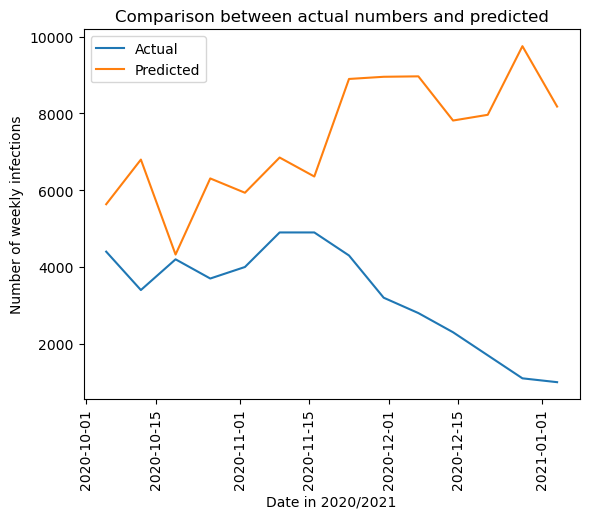

In [71]:
# YOUR CODE HERE
df_end = data_hidden_test.copy()
df_end["pred"] = season_2020_prediction

df_comp = pd.DataFrame({
    "date": df_end.apply(lambda r: get_date_from_year_and_week(r.name[0], r.name[1]), axis = 1),
    "pred": season_2020_prediction,
    "weekly_infections": df_end["weekly_infections"]
})

fig, ax = plt.subplots()
act_plot, = ax.plot(df_comp.date, df_comp.weekly_infections)
pred_plt, = ax.plot(df_comp.date, df_comp.pred)
plt.xticks(rotation=90)
plt.title("Comparison between actual numbers and predicted")
plt.xlabel("Date in 2020/2021")
plt.ylabel("Number of weekly infections")
plt.legend([act_plot, pred_plt], ["Actual", "Predicted"])
plt.show()


In [72]:
# tests, DO NOT MODIFY OR COPY THIS CELL!!

#### Findings 
Summarize your findings and lessons learned.

*Answer:*

In this exercise we explored a dataset in terms of the relationship between multiple independent variables to a dependent variable.
We used multiple scaling, feature selection and regression methods to model this relationship.

A lesson learned is that a model cannot perform that well if there is only really one variable that has predicitve power.
In this case only the temperature and its variations really had an impact on the weekly infections.
Simply modelling the influenza cases by the temperature will not result in a very accurate model.
We can see this reflected in the scores.
The R2 score never gets higher than `0.25`. 
This tells us that the model is only marginally better than always "predicting" the mean of the influence cases over the entire data set.

In this exercise we could also observe how the used models are not really in need of scaling.
This is because many of the models included in scikit learn are already quite robust.

What is also interesting about the prediction that were created is that they are very inaccurate.
This shows us that the model cannot really predict the future as there were many unforseen circumstances in the holdout data set (i.e. COVID-19 pandemic in the flu season 2020/2021).
It would be cool, to include extra variables in the model and see how it behaves.
If we were to f.e. have an estimate of the number of people working from home in a given week or a binary variable that denotes wether there is a lockdown, we could probably achieve better results.

## Congratulations, you are done!

Reminder:
Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).